<a href="https://colab.research.google.com/github/skhazaei/TensorFlow-repo/blob/master/diabetes_dataset_validation_set_regularisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load and return the diabetes dataset (regression) from `sklearn.datasets`

In [1]:
from sklearn.datasets import load_diabetes

diabete_dataset = load_diabetes()

## Check [here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html) to learn more about the dataset and `keys()`.


In [2]:
print(diabete_dataset.keys())

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])


In [3]:
print(diabete_dataset['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

## Let's save the input data and target for training

In [4]:
data = diabete_dataset['data']
target = diabete_dataset['target']

## Use `mean()` and `std()` to normalize the target so that the values are between 0 and 1

In [5]:
target = (target - target.mean(axis=0)) / target.std()

In [6]:
print(f'normalized target: \n\n{target}')

normalized target: 

[-1.47194752e-02 -1.00165882e+00 -1.44579915e-01  6.99512942e-01
 -2.22496178e-01 -7.15965848e-01 -1.83538046e-01 -1.15749134e+00
 -5.47147277e-01  2.05006151e+00 -6.64021672e-01 -1.07957508e+00
  3.48889755e-01  4.26806019e-01 -4.43258925e-01  2.45001404e-01
  1.80071184e-01 -1.05621783e-01 -7.15965848e-01  2.06043272e-01
 -1.09256112e+00 -1.33929596e+00 -1.09256112e+00  1.20596866e+00
  4.13819975e-01  6.47568766e-01 -1.96524090e-01 -8.71798376e-01
 -2.74440354e-01  1.69943833e+00 -3.00412442e-01 -1.20943552e+00
  2.45262887e+00 -8.45826288e-01 -1.13151925e+00 -6.51035629e-01
  1.46568953e+00  1.60853602e+00  1.29687096e+00 -8.06868156e-01
 -6.77007716e-01 -1.26137969e+00 -1.18346343e+00 -7.80896068e-01
  1.38777327e+00 -1.28735178e+00  4.91736239e-01 -1.31593871e-01
 -1.00165882e+00 -1.31593871e-01  3.72247006e-02  9.46247777e-01
 -1.20943552e+00 -6.25063541e-01  3.87847887e-01 -3.13398486e-01
 -1.30033783e+00 -1.49512849e+00  2.32015360e-01  2.32015360e-01
 -1.

## Split the data into train and test sets, test size to be 0.1 of total examples

In [7]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(data, target, test_size=0.1)

## Let's check the shape of train and test sets


In [8]:
print(f'train data shape: {train_data.shape}')
print(f'test data shape: {test_data.shape}')
print(f'train target shape: {train_target.shape}')
print(f'test target shape: {test_target.shape}')

train data shape: (397, 10)
test data shape: (45, 10)
train target shape: (397,)
test target shape: (45,)


## Define a feedforward neural network

In [9]:
import tensorflow as tf

def get_model():
  model = tf.keras.models.Sequential([tf.keras.layers.Dense(128, activation='relu', input_shape=(train_data.shape[1],)),
                                      tf.keras.layers.Dense(128, activation='relu'),
                                      tf.keras.layers.Dense(128, activation='relu'),
                                      tf.keras.layers.Dense(128, activation='relu'),
                                      tf.keras.layers.Dense(128, activation='relu'),
                                      tf.keras.layers.Dense(128, activation='relu'),
                                      tf.keras.layers.Dense(1)])
  return model

In [10]:
model = get_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1408      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 1

In [11]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.MeanSquaredError(), metrics=tf.keras.metrics.MeanAbsoluteError())

In [12]:
history = model.fit(train_data, train_target, batch_size=64,
                    validation_split=0.15, verbose=2, epochs=100)

Epoch 1/100
6/6 - 1s - loss: 1.0173 - mean_absolute_error: 0.8564 - val_loss: 0.8668 - val_mean_absolute_error: 0.8202
Epoch 2/100
6/6 - 0s - loss: 0.9268 - mean_absolute_error: 0.8205 - val_loss: 0.7368 - val_mean_absolute_error: 0.7621
Epoch 3/100
6/6 - 0s - loss: 0.7223 - mean_absolute_error: 0.7203 - val_loss: 0.6995 - val_mean_absolute_error: 0.7018
Epoch 4/100
6/6 - 0s - loss: 0.5797 - mean_absolute_error: 0.6197 - val_loss: 0.5982 - val_mean_absolute_error: 0.6253
Epoch 5/100
6/6 - 0s - loss: 0.5228 - mean_absolute_error: 0.5757 - val_loss: 0.5065 - val_mean_absolute_error: 0.6038
Epoch 6/100
6/6 - 0s - loss: 0.5185 - mean_absolute_error: 0.5865 - val_loss: 0.4989 - val_mean_absolute_error: 0.6093
Epoch 7/100
6/6 - 0s - loss: 0.4882 - mean_absolute_error: 0.5638 - val_loss: 0.5184 - val_mean_absolute_error: 0.6094
Epoch 8/100
6/6 - 0s - loss: 0.4778 - mean_absolute_error: 0.5598 - val_loss: 0.5451 - val_mean_absolute_error: 0.6003
Epoch 9/100
6/6 - 0s - loss: 0.4763 - mean_absol

In [13]:
model.evaluate(test_data, test_target, verbose=2)

2/2 - 0s - loss: 0.6562 - mean_absolute_error: 0.6425


[0.6561643481254578, 0.6425347924232483]

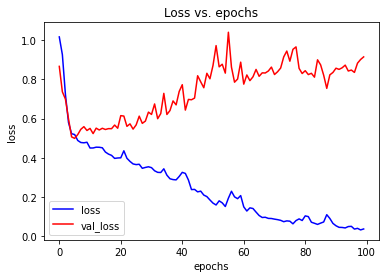

In [14]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string], 'b', label=string)
  plt.plot(history.history['val_'+string], 'r', label='val_'+string)
  plt.xlabel('epochs')
  plt.ylabel(string)
  plt.title('Loss vs. epochs')
  plt.legend()
  plt.show()

plot_graphs(history, 'loss')


# Model regularisation

In [16]:
def get_regularised_model(wd, rate):
  model = tf.keras.models.Sequential([tf.keras.layers.Dense(128, activation='relu', input_shape=(train_data.shape[1],),
                                                            kernel_regularizer=tf.keras.regularizers.l2(wd)),
                                      tf.keras.layers.Dropout(rate),
                                      tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(wd)),
                                      tf.keras.layers.Dropout(rate),
                                      tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(wd)),
                                      tf.keras.layers.Dropout(rate),
                                      tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(wd)),
                                      tf.keras.layers.Dropout(rate),
                                      tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(wd)),
                                      tf.keras.layers.Dropout(rate),
                                      tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(wd)),
                                      tf.keras.layers.Dropout(rate),
                                      tf.keras.layers.Dense(1)])
  return model

In [17]:
model = get_regularised_model(1e-5, 0.3)

In [18]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.MeanSquaredError(), metrics=tf.keras.metrics.MeanAbsoluteError())

In [19]:
history = model.fit(train_data, train_target, validation_split=0.15,
                    batch_size=64, epochs=100, verbose=2)

Epoch 1/100
6/6 - 1s - loss: 1.0339 - mean_absolute_error: 0.8581 - val_loss: 0.9070 - val_mean_absolute_error: 0.8297
Epoch 2/100
6/6 - 0s - loss: 1.0204 - mean_absolute_error: 0.8545 - val_loss: 0.8729 - val_mean_absolute_error: 0.8157
Epoch 3/100
6/6 - 0s - loss: 0.9670 - mean_absolute_error: 0.8277 - val_loss: 0.7823 - val_mean_absolute_error: 0.7751
Epoch 4/100
6/6 - 0s - loss: 0.8338 - mean_absolute_error: 0.7659 - val_loss: 0.6655 - val_mean_absolute_error: 0.7248
Epoch 5/100
6/6 - 0s - loss: 0.6740 - mean_absolute_error: 0.6747 - val_loss: 0.6630 - val_mean_absolute_error: 0.6776
Epoch 6/100
6/6 - 0s - loss: 0.6658 - mean_absolute_error: 0.6619 - val_loss: 0.6370 - val_mean_absolute_error: 0.6541
Epoch 7/100
6/6 - 0s - loss: 0.6349 - mean_absolute_error: 0.6410 - val_loss: 0.5685 - val_mean_absolute_error: 0.6519
Epoch 8/100
6/6 - 0s - loss: 0.5939 - mean_absolute_error: 0.6320 - val_loss: 0.5604 - val_mean_absolute_error: 0.6478
Epoch 9/100
6/6 - 0s - loss: 0.5690 - mean_absol

In [20]:
model.evaluate(train_data, train_target, verbose=2)

13/13 - 0s - loss: 0.3408 - mean_absolute_error: 0.4659


[0.34076258540153503, 0.4658714830875397]

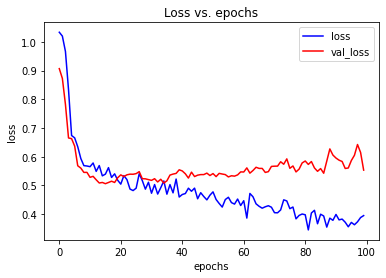

In [21]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string], 'b', label=string)
  plt.plot(history.history['val_'+string], 'r', label='val_'+string)
  plt.xlabel('epochs')
  plt.ylabel(string)
  plt.title('Loss vs. epochs')
  plt.legend()
  plt.show()

plot_graphs(history, 'loss')